In [ ]:
# Update sklearn to prevent version mismatches
!pip install sklearn --upgrade
#upgraded on 1/23/ 

In [ ]:
# install joblib. This will be used to save your model. 
# Restart your kernel after installing 
!pip install joblib
# said requirement already satisfied 1/23

In [146]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)


# Sklearn Evaluation Metrics
from sklearn import metrics
from sklearn.metrics import mean_squared_error, precision_score, confusion_matrix, accuracy_score

# Import packages
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Sklearn Packages
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Sklearn Evaluation Metrics
from sklearn import metrics
from sklearn.metrics import mean_squared_error, precision_score, confusion_matrix, accuracy_score

# Visualizes all the columns
pd.set_option('display.max_columns', None)


# Read the CSV and Perform Basic Data Cleaning

In [162]:
df = pd.read_csv("exoplanet_data.csv")
# Drop the null columns where all values are null
df = df.dropna(axis='columns', how='all')
# Drop the null rows
cl_df = df.dropna()
cl_df.head()

,koi_disposition,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,koi_time0bk_err2,koi_impact,koi_impact_err1,koi_impact_err2,koi_duration,koi_duration_err1,koi_duration_err2,koi_depth,koi_depth_err1,koi_depth_err2,koi_prad,koi_prad_err1,koi_prad_err2,koi_teq,koi_insol,koi_insol_err1,koi_insol_err2,koi_model_snr,koi_tce_plnt_num,koi_steff,koi_steff_err1,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,CONFIRMED,0,0,0,0,54.418383,2.479000e-04,-2.479000e-04,162.513840,0.003520,-0.003520,0.586,0.059,-0.443,4.50700,0.11600,-0.11600,874.8,35.5,-35.5,2.83,0.32,-0.19,443,9.11,2.87,-1.62,25.8,2,5455,81,-81,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,FALSE POSITIVE,0,1,0,0,19.899140,1.490000e-05,-1.490000e-05,175.850252,0.000581,-0.000581,0.969,5.126,-0.077,1.78220,0.03410,-0.03410,10829.0,171.0,-171.0,14.60,3.92,-1.31,638,39.30,31.04,-10.49,76.3,1,5853,158,-176,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
2,FALSE POSITIVE,0,1,0,0,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,-0.000115,1.276,0.115,-0.092,2.40641,0.00537,-0.00537,8079.2,12.8,-12.8,33.46,8.50,-2.83,1395,891.96,668.95,-230.35,505.6,1,5805,157,-174,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
3,CONFIRMED,0,0,0,0,2.525592,3.760000e-06,-3.760000e-06,171.595550,0.001130,-0.001130,0.701,0.235,-0.478,1.65450,0.04200,-0.04200,603.3,16.9,-16.9,2.75,0.88,-0.35,1406,926.16,874.33,-314.24,40.9,1,6031,169,-211,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509
4,CONFIRMED,0,0,0,0,4.134435,1.050000e-05,-1.050000e-05,172.979370,0.001900,-0.001900,0.762,0.139,-0.532,3.14020,0.06730,-0.06730,686.0,18.7,-18.7,2.77,0.90,-0.30,1160,427.65,420.33,-136.70,40.2,2,6046,189,-232,4.486,0.054,-0.229,0.972,0.315,-0.105,296.28613,48.224670,15.714


# Select your features (columns)

In [163]:
# Set features. This will also be used as your x values.koi_tce_plnt_num
# koi_fpflag_nt	koi_fpflag_ss	koi_fpflag_co	koi_fpflag_ec	koi_period	koi_period_err1	koi_period_err2	koi_time0bk	koi_time0bk_err1	koi_time0bk_err2	koi_impact	koi_impact_err1	koi_impact_err2	koi_duration	koi_duration_err1	koi_duration_err2	koi_depth	koi_depth_err1	koi_depth_err2	koi_prad	koi_prad_err1	koi_prad_err2	koi_teq	koi_insol	koi_insol_err1	koi_insol_err2	koi_model_snr	koi_steff	koi_steff_err1	koi_steff_err2	koi_slogg	koi_slogg_err1	koi_slogg_err2	koi_srad	koi_srad_err1	koi_srad_err2	ra	dec	koi_kepmag
# [20               25               18               24                5            17           26           30                  29          13                 4                   6            9               28             33              31                   19                7           37            36                8            34           35       15          11             10                3                 1              1                 12           21               14           16       1           23             22             27   2      32]
selected_features = cl_df[['koi_tce_plnt_num', 'koi_fpflag_nt', 'koi_fpflag_ss', 'koi_fpflag_co', 'koi_fpflag_ec', 'ra', 'dec', 'koi_srad', 'koi_srad_err1', 'koi_srad_err2', 'koi_steff', 'koi_steff_err1', 'koi_steff_err2', 'koi_model_snr', 'koi_slogg', 'koi_slogg_err1', 'koi_slogg_err2', 'koi_kepmag', 'koi_period', 'koi_period_err1', 'koi_period_err2', 'koi_time0bk', 'koi_time0bk_err1', 'koi_time0bk_err2', 'koi_depth', 'koi_depth_err1', 'koi_depth_err2', 'koi_prad', 'koi_prad_err1', 'koi_prad_err2', 'koi_teq', 'koi_insol', 'koi_insol_err1', 'koi_insol_err2', 'koi_duration', 'koi_duration_err1', 'koi_duration_err2', 'koi_impact', 'koi_impact_err1', 'koi_impact_err2']]
# 

# Create a Train Test Split

Use `koi_disposition` for the y values

In [164]:
X = selected_features
y = cl_df['koi_disposition']
print(X.shape, y.shape)
# .values.reshape(-1,1)

(6991, 40) (6991,)


In [165]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, stratify=y)

In [166]:
X_train.head()

,koi_tce_plnt_num,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,ra,dec,koi_srad,koi_srad_err1,koi_srad_err2,koi_steff,koi_steff_err1,koi_steff_err2,koi_model_snr,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_kepmag,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,koi_time0bk_err2,koi_depth,koi_depth_err1,koi_depth_err2,koi_prad,koi_prad_err1,koi_prad_err2,koi_teq,koi_insol,koi_insol_err1,koi_insol_err2,koi_duration,koi_duration_err1,koi_duration_err2,koi_impact,koi_impact_err1,koi_impact_err2
4002,2,0,0,1,0,293.05801,45.248821,0.492,0.026,-0.027,4932,145,-148,12.6,4.777,0.040,-0.027,15.801,99.673478,3.463000e-04,-3.463000e-04,219.334830,0.002300,-0.002300,2496.0,264.0,-264.0,576.14,30.44,-31.62,262,1.11,0.27,-0.23,0.9680,0.1790,-0.1790,11.6846,1.516,-10.450
4246,1,0,1,0,0,290.28094,45.464260,0.591,0.045,-0.045,4920,146,-146,303.8,4.664,0.056,-0.032,15.653,0.592244,9.000000e-08,-9.000000e-08,131.654831,0.000124,-0.000124,3992.4,18.2,-18.2,6.77,0.51,-0.52,1551,1361.22,410.79,-331.29,1.3860,0.0156,-0.0156,0.9860,0.048,-0.054
548,1,0,1,1,0,301.04239,45.022888,1.096,0.309,-0.206,5874,158,-176,220.3,4.338,0.153,-0.187,14.039,9.991625,5.360000e-06,-5.360000e-06,137.447816,0.000445,-0.000445,3450.5,19.2,-19.2,38.93,10.98,-7.31,907,160.14,132.50,-66.64,3.8552,0.0235,-0.0235,1.2560,0.258,-0.119
3953,1,0,1,0,0,288.32785,38.627621,1.148,0.202,-0.124,6078,122,-134,535.1,4.346,0.084,-0.126,13.944,178.412990,3.100000e-05,-3.100000e-05,218.225235,0.000127,-0.000127,37510.0,100.0,-100.0,33.24,5.85,-3.59,361,4.00,2.00,-1.09,2.9298,0.0124,-0.0124,0.9360,0.093,-0.046
2362,1,0,0,0,0,285.67938,50.241299,1.044,0.057,-0.042,5676,85,-68,134.8,4.347,0.030,-0.030,10.961,45.294223,5.600000e-05,-5.600000e-05,138.678725,0.000987,-0.000987,477.1,3.7,-3.7,2.26,0.12,-0.09,524,17.75,3.21,-2.17,6.8300,0.0343,-0.0343,0.0250,0.333,-0.025


# Pre-processing

Scale the data using the MinMaxScaler and perform some feature selection

In [167]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
# import tensorflow
# tensorflow.keras.__version__
X_scaler = MinMaxScaler().fit(X_train)

X_train_scaler = X_scaler.transform(X_train)
X_test_scaler = X_scaler.transform(X_test)

# Train the Model



In [168]:
from sklearn.preprocessing import LabelEncoder



from sklearn.svm import SVC 
model = SVC(kernel='linear')
model.fit(X_train_scaler, y_train)
# label_encoder = LabelEncoder()
# label_encoder.fit(y_train)
# encoded_y_train = label_encoder.transform(y_train)
# encoded_y_test = label_encoder.transform(y_test)

# encoded_y_train

# rf.fit(X_train_scaler, encoded_y_train)


SVC(kernel='linear')

In [169]:
# training_score = rf.score(X_train_scaler, encoded_y_train)
# testing_score = rf.score(X_test_scaler, encoded_y_test)
training_score = model.score(X_train_scaler, y_train)
testing_score = model.score(X_test_scaler, y_test)
# print(f"Training Data Score: {model.score(X_train_minmax, encoded_y_train)}")
# print(f"Testing Data Score: {model.score(X_test_minmax, encoded_y_test)}")
print(f"Training Data Score: {training_score}")
print(f"Testing Data Score: {testing_score}")

Training Data Score: 0.8439824527942018
Testing Data Score: 0.8415331807780321


# Create a classification Model

#  Feature Selection

In [ ]:
# # feature_importance , rfe, backwards elimination, etc
# importances = model.feature_importances_
# importances

In [51]:
# Pplanets = list(selected_features.columns)


In [52]:
# # We can sort the features by their importance
# sorted(zip(rf.feature_importances_, Pplanets), reverse=False)
# should probably try with koi_impac_err1 and 'koi_srad_err1') back in the selected features - since the testing data score 
# went down when the the imputs were correct through out

[(0.008441246791460718, 'koi_srad_err2'),
 (0.008597853556272123, 'koi_slogg'),
 (0.00874310980062724, 'koi_slogg_err1'),
 (0.00900651400683086, 'koi_srad'),
 (0.010204592386861404, 'koi_steff'),
 (0.010487223487471803, 'koi_kepmag'),
 (0.010496216185108613, 'koi_slogg_err2'),
 (0.011239680951216894, 'koi_impact_err2'),
 (0.011409239824832707, 'koi_impact_err1'),
 (0.011636157241563215, 'dec'),
 (0.011767075525728846, 'koi_srad_err1'),
 (0.01214583464379168, 'ra'),
 (0.012483331139022337, 'koi_insol_err2'),
 (0.013305245257352695, 'koi_depth_err1'),
 (0.013428949356057592, 'koi_time0bk'),
 (0.013596587124042813, 'koi_insol'),
 (0.013664116575229835, 'koi_depth_err2'),
 (0.016114105697859486, 'koi_teq'),
 (0.016937789155165306, 'koi_insol_err1'),
 (0.016950386059882614, 'koi_period_err1'),
 (0.01874235742308141, 'koi_impact'),
 (0.01927050801526513, 'koi_period_err2'),
 (0.020764783705136066, 'koi_depth'),
 (0.022055806405841427, 'koi_duration'),
 (0.02308785701794663, 'koi_period'),
 (

In [177]:
# removes insignificant variables and retrain models with significant features
selected_features = cl_df[['koi_tce_plnt_num', 'koi_fpflag_nt', 'koi_fpflag_ss', 'koi_fpflag_co', 'koi_fpflag_ec', 'ra', 'dec', 'koi_steff_err1', 'koi_steff_err2', 'koi_model_snr', 'koi_period', 'koi_period_err1', 'koi_period_err2', 'koi_time0bk', 'koi_time0bk_err1', 'koi_time0bk_err2', 'koi_depth', 'koi_depth_err1', 'koi_depth_err2', 'koi_prad', 'koi_prad_err1', 'koi_prad_err2', 'koi_teq', 'koi_insol', 'koi_insol_err1', 'koi_insol_err2', 'koi_duration', 'koi_duration_err1', 'koi_duration_err2', 'koi_impact', 'koi_impact_err1', 'koi_impact_err2']]
#,,[(0.008441246791460718, 'koi_srad_err2'), (0.008597853556272123, 'koi_slogg'), #  (0.00874310980062724, 'koi_slogg_err1'),
#  (0.00900651400683086, 'koi_srad'), (0.010204592386861404, 'koi_steff'), #  (0.010487223487471803, 'koi_kepmag'), 'koi_slogg_err2',
#  (0.010496216185108613, 'koi_slogg_err2'),

# [(0.01410490578983619, 'koi_srad_err2'),
#  (0.015052134927837428, 'koi_slogg_err1'),
#  (0.015755639380292074, 'koi_srad'),
#  (0.015814925469765838, 'koi_slogg'),
#  (0.016685934965700318, 'koi_steff'),
#  (0.017343393315965013, 'koi_kepmag'),

In [178]:
X = selected_features
y = cl_df['koi_disposition']
print(X.shape, y.shape)

# data = X.copy().values.reshape(-1,1)

(6991, 32) (6991,)


In [179]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, stratify=y)

In [180]:
X_scaler = MinMaxScaler().fit(X_train)

X_train_scaler = X_scaler.transform(X_train)
X_test_scaler = X_scaler.transform(X_test)

In [181]:
from sklearn.preprocessing import LabelEncoder

from sklearn.svm import SVC 
model = SVC(kernel='linear')
model.fit(X_train_scaler, y_train)
# label_encoder = LabelEncoder()
# label_encoder.fit(y_train)
# encoded_y_train = label_encoder.transform(y_train)
# encoded_y_test = label_encoder.transform(y_test)

# encoded_y_train

# rf.fit(X_train_scaler, encoded_y_train)

SVC(kernel='linear')

In [182]:
# training_score = rf.score(X_train_scaler, encoded_y_train)
# testing_score = rf.score(X_test_scaler, encoded_y_test)
training_score = model.score(X_train_scaler, y_train)
testing_score = model.score(X_test_scaler, y_test)
# print(f"Training Data Score: {model.score(X_train_minmax, encoded_y_train)}")
# print(f"Testing Data Score: {model.score(X_test_minmax, encoded_y_test)}")
print(f"Training Data Score: {training_score}")
print(f"Testing Data Score: {testing_score}")

Training Data Score: 0.8474156017547205
Testing Data Score: 0.8375286041189931


In [170]:
from sklearn.feature_selection import RFE
model = LogisticRegression(solver='lbfgs')
rfe = RFE(model, 3)
fit = rfe.fit(X, y)
print("Num Features: %d" % fit.n_features_)
print("Selected Features: %s" % fit.support_)
print("Feature Ranking: %s" % fit.ranking_)

C:\Users\jump1\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\jump1\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/module

C:\Users\jump1\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\jump1\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/module

C:\Users\jump1\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\jump1\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/module

Num Features: 3
Selected Features: [False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False  True  True False False False False  True False
 False False False False]
Feature Ranking: [28 20 25 18 24  5 17 26 30 31 13  4  6  9 29 34 32 19  7 38 37  8 35 36
 15 11 10  3  1  1 12 21 14 16  1 23 22 27  2 33]


In [171]:
#koi_tce_plnt_num koi_fpflag_nt	koi_fpflag_ss	koi_fpflag_co	koi_fpflag_ec	koi_period	koi_period_err1	koi_period_err2	koi_time0bk	koi_time0bk_err1	koi_time0bk_err2	koi_impact	koi_impact_err1	koi_impact_err2	koi_duration	koi_duration_err1	koi_duration_err2	koi_depth	koi_depth_err1	koi_depth_err2	koi_prad	koi_prad_err1	koi_prad_err2	koi_teq	koi_insol	koi_insol_err1	koi_insol_err2	koi_model_snr	 koi_steff	koi_steff_err1	koi_steff_err2	koi_slogg	koi_slogg_err1	koi_slogg_err2	koi_srad	koi_srad_err1	koi_srad_err2	ra	dec	koi_kepmag
# [20               25               18               24                5            17           26           30                  29          13                 4                   6            9               28             33              31                   19                7           37            36                8            34           35               15                 11             10                3                1              1               12           21            14           16           1             23               22          27   2      32]
    
selected_features2 = cl_df[['koi_period', 'dec', 'koi_impact', 'koi_impact_err1', 'koi_impact_err2', 'koi_depth_err1', 'koi_prad_err1', 'koi_insol_err2', 'koi_model_snr', 'koi_steff', 'koi_steff_err1', 'koi_srad', 'koi_insol_err1', 'koi_steff_err2', 'koi_time0bk_err2', 'koi_slogg_err1', 'koi_insol', 'koi_slogg_err2', 'koi_period_err1', 'koi_depth', 'koi_fpflag_nt', 'koi_slogg', 'koi_srad_err2', 'koi_srad_err1', 'koi_fpflag_ec', 'koi_fpflag_ss', 'koi_period_err2', 'ra', 'koi_duration', 'koi_time0bk_err1', 'koi_time0bk', 'koi_duration_err1', 'koi_kepmag', 'koi_tce_plnt_num']]
# selected_features = cl_df[[,, 'koi_fpflag_co', 'koi_slogg_err1',,,, , 'koi_depth', 'koi_depth_err2', 'koi_prad', 'koi_prad_err2', 'koi_teq', 'koi_duration_err2',
# 

In [172]:
X = selected_features2
y = cl_df['koi_disposition']
print(X.shape, y.shape)

(6991, 34) (6991,)


In [173]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, stratify=y)

In [174]:
X_scaler = MinMaxScaler().fit(X_train)

X_train_scaler = X_scaler.transform(X_train)
X_test_scaler = X_scaler.transform(X_test)

In [175]:

model = SVC(kernel='linear')
model.fit(X_train_scaler, y_train)

SVC(kernel='linear')

In [176]:
training_score = model.score(X_train_scaler, y_train)
testing_score = model.score(X_test_scaler, y_test)
# print(f"Training Data Score: {model.score(X_train_minmax, encoded_y_train)}")
# print(f"Testing Data Score: {model.score(X_test_minmax, encoded_y_test)}")
print(f"Training Data Score: {training_score}")
print(f"Testing Data Score: {testing_score}")

Training Data Score: 0.7901964524127408
Testing Data Score: 0.7814645308924485


# Hyperparameter Tuning

Use `GridSearchCV` to tune the model's parameters

In [183]:
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [1, 5, 10, 50],
              'gamma': [0.0001, 0.0005, 0.001, 0.005]}
grid = GridSearchCV(model, param_grid, verbose=3)


print(grid)

GridSearchCV(estimator=SVC(kernel='linear'),
             param_grid={'C': [1, 5, 10, 50],
                         'gamma': [0.0001, 0.0005, 0.001, 0.005]},
             verbose=3)


In [ ]:
model.get_params().keys()

In [184]:
# Train the model utils GridSearchgri
# import random
# random.seed(0)
# from sklearn.utils import parallel_backend

# with parallel_backend('threading'):
grid.fit(X_train_scaler, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV 1/5] END ..............................C=1, gamma=0.0001; total time=   0.4s
[CV 2/5] END ..............................C=1, gamma=0.0001; total time=   0.3s
[CV 3/5] END ..............................C=1, gamma=0.0001; total time=   0.3s
[CV 4/5] END ..............................C=1, gamma=0.0001; total time=   0.3s
[CV 5/5] END ..............................C=1, gamma=0.0001; total time=   0.3s
[CV 1/5] END ..............................C=1, gamma=0.0005; total time=   0.3s
[CV 2/5] END ..............................C=1, gamma=0.0005; total time=   0.3s
[CV 3/5] END ..............................C=1, gamma=0.0005; total time=   0.3s
[CV 4/5] END ..............................C=1, gamma=0.0005; total time=   0.4s
[CV 5/5] END ..............................C=1, gamma=0.0005; total time=   0.2s
[CV 1/5] END ...............................C=1, gamma=0.001; total time=   0.2s
[CV 2/5] END ...............................C=1,

GridSearchCV(estimator=SVC(kernel='linear'),
             param_grid={'C': [1, 5, 10, 50],
                         'gamma': [0.0001, 0.0005, 0.001, 0.005]},
             verbose=3)

In [185]:
print(grid.best_params_)
print(grid.best_score_)

{'C': 50, 'gamma': 0.0001}
0.8821285630080264


In [186]:

RFC = grid.best_estimator_
print('Test accuracy: %.3f' % RFC.score(X_test_scaler, y_test))

Test accuracy: 0.879


# Save the Model

In [187]:
# save your model by updating "your_name" with your name
# and "your_model" with your model variable
# be sure to turn this in to BCS
# if joblib fails to import, try running the command to install in terminal/git-bash
import joblib 
filename = 'JuliannPezzullo-SVC.sav'
joblib.dump(model, filename)

['JuliannPezzullo-SVC.sav']

In [ ]:
from joblib import load

In [ ]:
rf=load('JuliannPezzullo-RF3.sav') 

Confusion matrix, without normalization
[[237 180   5]
 [ 82 353  15]
 [  2   0 874]]
Normalized confusion matrix
[[0.56 0.43 0.01]
 [0.18 0.78 0.03]
 [0.   0.   1.  ]]


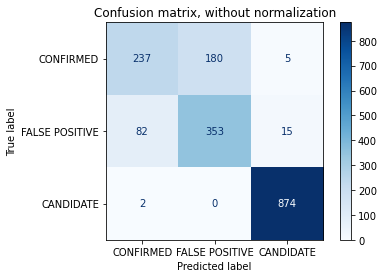

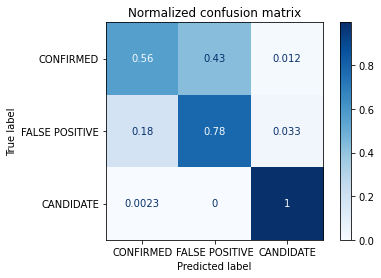

In [188]:
import numpy as np
import matplotlib.pyplot as plt

# from sklearn import svm, datasets
# from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix

# import some data to play with
# iris = datasets.load_iris()
# X = iris.data
# y = iris.target
# class_names = iris.target_names


X = selected_features
y= cl_df['koi_disposition'].values.reshape(-1,1)
class_names = ['CONFIRMED', 'FALSE POSITIVE', 'CANDIDATE']

# Split the data into a training set and a test set
# X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# # Run classifier, using a model that is too regularized (C too low) to see
# # the impact on the results
# classifier = svm.SVC(kernel='linear', C=0.01).fit(X_train, y_train)

np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(model, X_test_scaler, y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

In [ ]:
loaded_model = joblib.load('JuliannPezzullo-RF3.sav') 


In [ ]:
result = loaded_model.score(X_test_scaler, encoded_y_test)
print(result)